In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.style as style

In [2]:
plt.rcParams["font.family"] = "Times New Roman"

# test cumulative revenue

In [3]:
pv = pd.read_csv("E:\\final dqn\\solar\\dqn\\run3\\cum.csv")
wd = pd.read_csv("E:\\final dqn\\wind\\run1\\cum.csv")
testdf = pd.DataFrame()
testdf["hour"] = pv["hour"]
testdf["pvbase"] = pv["cum_base"]
testdf["pvopt"] = pv["cum_opt"]
testdf["wdbase"] = wd["cum_base"]
testdf["wdopt"] = wd["cum_opt"]
testdf

,hour,pvbase,pvopt,wdbase,wdopt
0,0,0.0000,0.000000,6.5136,6.51360
1,1,0.0000,0.000000,8.8297,8.82970
2,2,0.0000,0.000000,7.8913,7.89130
3,3,0.0000,0.000000,5.7111,5.91130
4,4,0.0000,0.000000,4.0068,3.98758
...,...,...,...,...,...
8731,8731,45465.9093,46963.805355,57160.8013,58836.50575
8732,8732,45465.9093,46963.805355,57164.4829,58840.18735
8733,8733,45465.9093,46963.805355,57167.1532,58842.85765
8734,8734,45465.9093,46963.805355,57168.9340,58844.63845


(55000.0, 60000.0)

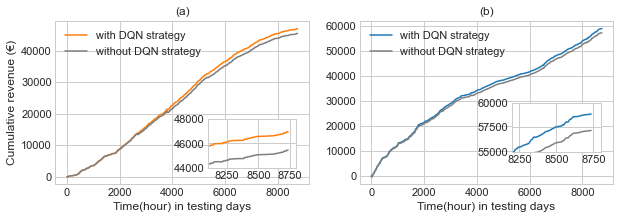

In [17]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_ylabel('Cumulative revenue (€)')
ax1.set_xlabel('Time(hour) in testing days')
ax1.set_title("(a)")
ax1.plot(testdf['pvopt'], label='with DQN strategy',color="#FF7F0E")
ax1.plot(testdf['pvbase'], label='without DQN strategy',color="#7F7F7F")
ax1.legend(loc=2)
inset_ax1 = ax1.inset_axes([0.6,0.1,0.35,0.3]) 
inset_ax1.plot(testdf['pvopt'], label='with DQN strategy',color="#FF7F0E")
inset_ax1.plot(testdf['pvbase'], label='without DQN strategy',color="#7F7F7F")
inset_ax1.set_xlim([8100,8800])
inset_ax1.set_ylim([44000,48000])

ax2.set_xlabel('Time(hour) in testing days')
ax2.set_title("(b)")
ax2.plot(testdf['wdopt'], label='with DQN strategy',color="#1F77B4")
ax2.plot(testdf['wdbase'], label='without DQN strategy',color="#7F7F7F")
ax2.legend(loc=2)
inset_ax2 = ax2.inset_axes([0.6,0.2,0.35,0.3]) 
inset_ax2.plot(testdf['wdopt'], label='with DQN strategy',color="#1F77B4")
inset_ax2.plot(testdf['wdbase'], label='without DQN strategy',color="#7F7F7F")
inset_ax2.set_xlim([8200,8800])
inset_ax2.set_ylim([55000,60000])

In [18]:
fig.savefig("cumrev.png",dpi=800,bbox_inches='tight')

# training process

In [8]:
pv1 = pd.read_csv("E:\\final dqn\\solar\\dqn\\run1\\train_episode_R.txt")
pv2 = pd.read_csv("E:\\final dqn\\solar\\dqn\\run2\\train_episode_R.txt")
pv3 = pd.read_csv("E:\\final dqn\\solar\\dqn\\run3\\train_episode_R.txt")
pv4 = pd.read_csv("E:\\final dqn\\solar\\dqn\\run4\\train_episode_R.txt")
pv5 = pd.read_csv("E:\\final dqn\\solar\\dqn\\run5\\train_episode_R.txt")
wd1 = pd.read_csv("E:\\final dqn\\wind\\run1\\train_episode_R.txt")
wd2 = pd.read_csv("E:\\final dqn\\wind\\run2\\train_episode_R.txt")
wd3 = pd.read_csv("E:\\final dqn\\wind\\run3\\train_episode_R.txt")
wd4 = pd.read_csv("E:\\final dqn\\wind\\run4\\train_episode_R.txt")
wd5 = pd.read_csv("E:\\final dqn\\wind\\run5\\train_episode_R.txt")

In [9]:
def calculate_sma(col):
    values = col.to_numpy()
    sma = []
    for i in range(0, values.size):
        array = values[:i + 1]
        mean_reward = np.mean(array[-100:])
        sma.append(mean_reward)
    return sma

In [10]:
pvsma1 = calculate_sma(pv1["return"])
pvsma2 = calculate_sma(pv2["return"])
pvsma3 = calculate_sma(pv3["return"])
pvsma4 = calculate_sma(pv4["return"])
pvsma5 = calculate_sma(pv5["return"])
wdsma1 = calculate_sma(wd1["return"])
wdsma2 = calculate_sma(wd2["return"])
wdsma3 = calculate_sma(wd3["return"])
wdsma4 = calculate_sma(wd4["return"])
wdsma5 = calculate_sma(wd5["return"])

In [11]:
df = pd.DataFrame()
df["ep"] = pv1["ep"]
df["pvsma1"] = pvsma1
df["pvsma2"] = pvsma2
df["pvsma3"] = pvsma3
df["pvsma4"] = pvsma4
df["pvsma5"] = pvsma5
df["wdsma1"] = wdsma1
df["wdsma2"] = wdsma2
df["wdsma3"] = wdsma3
df["wdsma4"] = wdsma4
df["wdsma5"] = wdsma5
df

,ep,pvsma1,pvsma2,pvsma3,pvsma4,pvsma5,wdsma1,wdsma2,wdsma3,wdsma4,wdsma5
0,1,-2252.543566,-2813.787720,-1970.513929,-2607.229687,-1664.217590,-686.875583,-848.883035,-436.456774,-512.123799,-597.776156
1,2,-2327.983244,-2399.728186,-2082.672233,-2230.376976,-2000.259109,-706.605829,-761.451940,-720.609173,-503.825596,-516.110046
2,3,-2440.232463,-2254.533922,-2108.126777,-2259.181502,-2023.686989,-761.691726,-768.374555,-677.070862,-673.753520,-647.612633
3,4,-2468.546652,-2334.252844,-2018.090865,-2201.017702,-2044.783580,-716.444291,-734.990108,-666.348477,-650.153502,-654.155314
4,5,-2391.811709,-2421.452876,-2007.488234,-2330.037378,-2030.420260,-766.705621,-730.962575,-725.472915,-660.033990,-631.217797
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,-621.807850,-634.517573,-631.821405,-656.986242,-608.154032,-321.136267,-320.346951,-358.488816,-246.205180,-278.702520
4996,4997,-624.221904,-635.199469,-631.867117,-658.445630,-612.096572,-320.441177,-319.440005,-359.839057,-245.541627,-278.042027
4997,4998,-623.465779,-634.962985,-633.096705,-659.337401,-615.987086,-321.926596,-315.833027,-361.904756,-247.176947,-275.799979
4998,4999,-622.097505,-636.400011,-630.415265,-656.884070,-617.483337,-320.437813,-316.250399,-364.175100,-247.286444,-274.073180


In [12]:
pvcol = df.loc[:,"pvsma1":"pvsma5"]
pvmean = pvcol.mean(axis=1)
pvstd = pvcol.std(axis=1)
wdcol = df.loc[:,"wdsma1":"wdsma5"]
wdmean = wdcol.mean(axis=1)
wdstd = wdcol.std(axis=1)

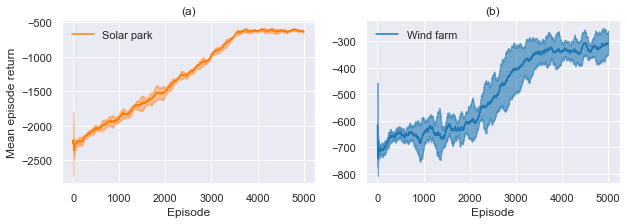

In [13]:
sns.set_theme()
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
x = df["ep"]

ax1.plot(x,pvmean,label="Solar park",color="#FF7F0E")
ax1.fill_between(x,pvmean-pvstd,pvmean+pvstd,alpha=0.4,color="#FF7F0E")
ax1.set_xlabel("Episode")
ax1.set_ylabel('Mean episode return')
ax1.set_title("(a)")
ax1.legend()

ax2.plot(x,wdmean,label="Wind farm",color="#1F77B4")
ax2.fill_between(x,wdmean-wdstd,wdmean+wdstd,alpha=0.6,color="#1F77B4")
ax2.set_xlabel('Episode')
ax2.set_title("(b)")
ax2.legend()

In [14]:
fig.savefig('training.png', dpi=800, bbox_inches='tight')